### Constrained motion planning instability problem
#### with virtual plane
```
BKPIECEkConfigDefault:     30617.1 ms/100 = 306.2 ms (45.038/900.671)
KPIECEkConfigDefault:     40873.6 ms/100 = 408.7 ms (19.622/1969.107)
RRTkConfigDefault:     43292.3 ms/100 = 432.9 ms (18.505/2624.852)
RRTConnectkConfigDefault:     27144.7 ms/5 = 5428.9 ms (251.446/7565.886)
LBKPIECEkConfigDefault:     43063.5 ms/5 = 8612.7 ms (5521.325/10175.108)
```
- BKPIECE < KPIECE < RRT

#### with detected plane
```
BKPIECEkConfigFine: 	226720.7 ms/100 = 2267.2 ms (69.937/10082.002)
KPIECEkConfigFine: 	44196.6 ms/100 = 442.0 ms (46.311/1800.006)
RRTkConfigFine: 	9627.6 ms/100 = 96.3 ms (39.244/344.946)
BKPIECEkConfigBad: 	100600.4 ms/10 = 10060.0 ms (10027.311/10100.471)
KPIECEkConfigBad: 	77786.7 ms/10 = 7778.7 ms (418.654/10314.316)
RRTkConfigBad: 	100182.4 ms/10 = 10018.2 ms (10011.62/10033.246)
```
  - Fine 케이스에서 RRT < KPIECE < BKPIECE, Bad 케이스에서 KPIECE < RRT,BKPIECE로 ***virtual 실험과 다른 경향***
  - 좌표계와 정렬이 안된 게 퍼포먼스에 영향? - 아님
    - plane 좌표계 정렬 시 - 차이 없음
    ```
    BKPIECEkConfigFine: 	256170.0 ms/100 = 2561.7 ms (110.218/10085.097)
    KPIECEkConfigFine: 	51639.0 ms/100 = 516.4 ms (45.206/4278.697)
    RRTkConfigFine: 	8345.3 ms/100 = 83.5 ms (40.361/254.023)
    BKPIECEkConfigBad: 	100390.1 ms/10 = 10039.0 ms (10020.31/10081.335)
    KPIECEkConfigBad: 	67244.2 ms/10 = 6724.4 ms (544.676/10235.968)
    RRTkConfigBad: 	100197.3 ms/10 = 10019.7 ms (10013.146/10033.654)
    ```
    - 로봇 좌표계까지 정렬 시
    ```
    BKPIECEkConfigFine: 	7481.8 ms/10 = 748.2 ms (112.028/1916.677)
    KPIECEkConfigFine: 	6193.5 ms/10 = 619.3 ms (59.914/1562.995)
    RRTkConfigFine: 	673.7 ms/10 = 67.4 ms (37.57/124.372)
    BKPIECEkConfigBad: 	100514.2 ms/10 = 10051.4 ms (10029.246/10087.536)
    KPIECEkConfigBad: 	78809.0 ms/10 = 7880.9 ms (115.464/10189.973)
    RRTkConfigBad: 	100183.0 ms/10 = 10018.3 ms (10012.292/10043.563)
    ```
    - 위치 이동 시 (singularity 벗어남)
    ```
    BKPIECEkConfigFine: 	34645.1 ms/20 = 1732.3 ms (71.716/7965.63)
    KPIECEkConfigFine: 	6206.0 ms/20 = 310.3 ms (51.943/1301.905)
    RRTkConfigFine: 	2056.1 ms/20 = 102.8 ms (42.116/197.287)
    BKPIECEkConfigBad: 	9200.0 ms/5 = 1840.0 ms (225.816/5248.372)
    KPIECEkConfigBad: 	5768.9 ms/5 = 1153.8 ms (318.394/1767.999)
    RRTkConfigBad: 	485.6 ms/5 = 97.1 ms (74.2/126.474)
    ```
    - 모든 변형 시나리오에서 경향성 동일하게 관찰
 
  - Virtual 결과 일관적이지 않음, 대량 실험 해서 경향성 세밀 분석 - virtual에서 좁은 트랙 설정하지 않은 것이 원인
    - 3m 넓은 트랙, 90% inlier
    ```
    BKPIECEkConfigDefault - 364.211755329 ms  - 1
    KPIECEkConfigDefault - 1111.92541652 ms    - 3
    RRTkConfigDefault - 480.864795049 ms         - 2
    RRTConnectkConfigDefault:     5428.9 ms        - 4
    ```
    - 0.5m 좁은 트랙, 90% inlier
    ```
    BKPIECEkConfigDefault - 951.631975174 ms   - 3
    KPIECEkConfigDefault - 351.74937778 ms       - 2
    RRTkConfigDefault - 73.9153014289 ms          - 1
    RRTConnectkConfigDefault: 8024.9 ms             - 4
    ```
  - **잠정 결론:**
    - 넓은 평면에서는 BKPIECE가 효용이 있으나 좁은 면에선 KPIECE가 나음
    - KPIECE는 넓은 면에서 성능 저하가 심함
    - 종합적으로는 그냥 RRT-Connect는 좁은면, 넓은 면 모두 성능 매우 떨어짐
    - 종합적으로는 그냥 RRT가 안정적이게 우수  
    
    
  - **추가 문제 발생 시 의문 사항:**
    - Bad 케이스 KPIECE로 만들어진 경로는 실제 동작도 유효한지? 불연속한 경로 아닌지?
    - 실험 코드의 구속 조건 자체에 오류?

## set running directory to project source

In [1]:
import os
import numpy as np
import time
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))
import matplotlib.pyplot as plt

## 4.1 PlanningScene

##### initialize CombinedRobot and GeometryScene

In [2]:
from pkg.controller.combined_robot import *
from pkg.project_config import *
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None)   # create scene builder without detector for virtual scene
crob = CombinedRobot(robots_on_scene=[
    RobotConfig(0, RobotType.indy7, ((0,-0.7,0), (0,0,0)), None),
    RobotConfig(1, RobotType.panda, ((0,0.1,0), (0,0,0)), None)]
                     , connection_list=[False])
gscene = s_builder.create_gscene(crob)
gtems = s_builder.add_robot_geometries(color=(0,1,0,0.5), display=True, collision=True)
gscene.show_pose(crob.home_pose)

connection command:
indy0: False
Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


Please create a subscriber to the marker
publication OK
published: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Please create a subscriber to the marker


##### add geometries

In [3]:
from pkg.geometry.geometry import *

# add environments (fixed=True for non-movable geometries)
wall = gscene.create_safe(GEOTYPE.BOX, "wall", "base_link", (3,3,0.01), (-0.2,0,0), 
                           rpy=(0,np.pi/2,0), color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=True)
floor = gscene.create_safe(GEOTYPE.BOX, "floor", "base_link", (3,3,0.01), (0,0,0), 
                           rpy=(0,0,0), color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=True)
track = gscene.create_safe(GEOTYPE.BOX, "track", "base_link", (0.5,0.5,0.01), (0.4,-0.3,0.01), 
                           rpy=(0,0,0), color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=True, parent='floor')
wp1 = gscene.create_safe(GEOTYPE.BOX, "wp1", "base_link", (0.1,0.1,0.01), (-0.2,0,0),rpy=(0,0,0), 
                         color=(0.8,0.2,0.2,1), display=True, fixed=True, collision=False, parent="track")
wp2 = gscene.create_safe(GEOTYPE.BOX, "wp2", "base_link", (0.1,0.1,0.01), (0.2,0,0), rpy=(0,0,0), 
                         color=(0.8,0.2,0.2,1), display=True, fixed=True, collision=False, parent="track")
goal = gscene.create_safe(GEOTYPE.BOX, "goal", "base_link", (0.1,0.1,0.01), (0.3,-0.4,0.01), 
                          rpy=(0,0,0), color=(0.2,0.2,0.8,1), display=True, fixed=True, collision=False)
 
# add movable (fixed=False for movable geometries)
box1 = gscene.create_safe(GEOTYPE.BOX, "box1", "base_link", (0.05,0.05,0.05), (0.3,0.4,0.031), 
                          rpy=(0,0,0), color=(0.8,0.2,0.2,1), display=True, fixed=False, collision=True)

obstacle = gscene.create_safe(GEOTYPE.BOX, "obstacle", "base_link", (0.05,0.05,0.05), (0.5,0.4,0.031), 
                          rpy=(0,0,0), color=(0.8,0.8,0.2,1), display=True, fixed=False, collision=True)

##### create PlanningScene

In [4]:
from pkg.planning.scene import PlanningScene
pscene = PlanningScene(gscene, combined_robot=crob)

##### create_binder
- Binders (or Actors) are binding points where objects can be attached (or binded)
- Examples are 
  - PlacePlane: plane for object placement
  - Gripper2Tool: 2-finger gripper tool for grasp objects
  - SweepTool: action point to pass waypoints for sweep task

In [5]:
from pkg.planning.constraint.constraint_actor import PlacePlane, Gripper2Tool, SweepFramer

In [6]:
# create PlacePlane on geometry "floor" and "goal"
# when point is not set, the entire upper surface of the geometry becomes valid binding area.
# when point is set, the specific point becomes the only valid binding point.
pscene.create_binder(bname="track", gname="track", _type=PlacePlane)
pscene.create_binder(bname="goal", gname="goal", _type=PlacePlane, point=(0,0,0.005))

In [7]:
# add collision boundary for gripper base
# - set link_name="indy0_tcp" to attach the geometry to end-effector link
# - it can be labeled as fixed=True, as it is "fixed" on the indy0_tcp link
gripper =  gscene.create_safe(GEOTYPE.BOX, "gripper", link_name="indy0_tcp", 
                                dims=(0.02,0.1,0.1), center=(0,0,0.05), rpy=(0,0,0), 
                                color=(0.8,0.2,0.2,0.5), display=True, fixed=True, collision=True)

# add gripper fingers - By setting parent="gripper", the position of geometry can be set relative to the parent geometry
finger1 =  gscene.create_safe(GEOTYPE.BOX, "finger1", link_name="indy0_tcp",
                              dims=(0.04,0.02,0.1), center=(0,0.05,0.07), rpy=(0,0,0), 
                              color=(0.8,0.2,0.2,0.5), display=True, fixed=True, collision=True, parent="gripper")
finger2 =  gscene.create_safe(GEOTYPE.BOX, "finger2", link_name="indy0_tcp", 
                              dims=(0.04,0.02,0.1), center=(0,-0.05,0.07), rpy=(0,0,0), 
                              color=(0.8,0.2,0.2,0.5), display=True, fixed=True, collision=True, parent="gripper")

# create Gripper2Tool binder
# Gripper2Tool is a 2-finger gripper, which can rotate along z-direction.
# To align the z-direction with the 2 fingers, rotate by 90 degree along roll axis.
# The gripping point is (0,0,0.11) in local coordinate of "gripper" geometry
pscene.create_binder(bname="grip0", gname="gripper", _type=Gripper2Tool, point=(0,0,0.11), rpy=(-np.pi/2,0,0))

In [8]:
# Add virtual (no-collision) sweep face. the point is 0.2 m away from the "indy0_tcp" link
# To match the z-direction with the target surface, the geometry is rotated 180 degrees in pitch-axis.
sweep_face =  gscene.create_safe(GEOTYPE.BOX, "sweep_face", link_name="indy0_tcp", 
                                dims=(0.05,0.05,0.001), center=(0,0,0.2), rpy=(0,np.pi,0), 
                                color=(0.2,0.2,0.8,0.1), display=True, fixed=True, collision=False)
sweep_face =  gscene.create_safe(GEOTYPE.BOX, "sweep_face_col", link_name="indy0_tcp", 
                                dims=(0.15,0.15,0.05), center=(0,0,0.2-0.03), rpy=(0,np.pi,0), 
                                color=(0.2,0.2,0.8,0.1), display=True, fixed=True, collision=True)
                                 
# create SweepTool binder
pscene.create_binder(bname="sweep_face", gname="sweep_face", _type=SweepFramer, point=(0,0,0), rpy=(0,0,0))

##### create_subject
* Subject describes the tasks in the planning scene.
* There are 2 categories in subject:
  1. Object: The object has grip points and placement points for pick&place task
  2. Task: The task is can be any non-physical task. Check SweepLineTask for example
* The subjects can be composed of multiple action points. Examples are:
  1. Grasp2Point: grasping point for 2-finger gripper. 
  2. PlacePoint: The point to place object.
  3. SweepPoint: A waypoint for SweepLineTask.
  * The above 3 action points inherit DirectePoint, for which the orientation is free along z-axis. 
  * If "point" parameter is not set, the entire upper surface is becomes valid action area.

In [9]:
from pkg.planning.constraint.constraint_subject import Grasp2Point, PlacePoint, SweepFrame
from pkg.planning.constraint.constraint_subject import CustomObject, SweepLineTask

In [10]:
## create box object with grasping points along positive & negative y-direction and placement point in the bottom face
box_obj = pscene.create_subject(oname="box1", gname="box1", _type=CustomObject, 
                             action_points_dict = {
                                 "handle1": Grasp2Point("handle1", box1, [0,0,0], [-np.pi/2,0,0]),
                                 "handle2": Grasp2Point("handle2", box1, [0,0,0], [np.pi/2,0,0]),
                                 "bottom": PlacePoint("bottom", box1, [0,0,-0.026], [0,0,0])})

In [11]:
## create sweep task with 2 waypoints
sweep = pscene.create_subject(oname="sweep", gname="track", _type=SweepLineTask, 
                             action_points_dict = {"wp1": SweepFrame("wp1", wp1, [0,0,wp1.dims[2]/2], [0,0,0]),
                                                   "wp2": SweepFrame("wp2", wp2, [0,0,wp2.dims[2]/2], [0,0,0])}
                             )

##### initialize_state
* initialize_state(robot_pose) updates robot pose and gets corresponding binding status of current scene.
* state.node of ('floor', 0) means the first subject (object) is placed on the floor and the second subject (sweep) has passed 0 waypoints

In [12]:
initial_state = pscene.initialize_state(crob.home_pose)
print(initial_state.node)

('track', 0)


## 4.2 MotionPlanner

##### MoveitPlanner
* *get_available_binding_dict()* gets available binding states for each subject in a dictionary
* *sample_leaf_state samples()* target state with given available_binding_dict and target node
* *rebind_all()* updates binding state and returns the resultant state
* The motions tested in this section are:
  - pick: move the object to "gripper"
  - place: move the object to "goal"
  - sweep: 
    1) approach to waypoint 1
    2) sweep to waypoint 2
    3) return to home pose

In [13]:
from pkg.planning.motion.moveit.moveit_planner import MoveitPlanner
mplan = MoveitPlanner(pscene)

In [14]:
from pkg.planning.motion.moveit.moveit_planner import PlannerConfig
from pkg.planning.motion.moveit.moveit_py import ConstrainedSpaceType

In [15]:
gtimer=GlobalTimer.instance()
gtimer.reset()
# sweep motion 1 - reach the first waypoint
from_state = initial_state.copy(pscene)
from_state.Q = crob.home_pose
to_node = ("track", 1)
for _ in range(20):
    available_binding_dict = pscene.get_available_binding_dict(from_state, to_node)
    to_state, redundancy_dict = pscene.sample_leaf_state(from_state, available_binding_dict, to_node)
    with gtimer.block("plan"):
        Traj, LastQ, error, success, binding_list = mplan.plan_transition(from_state, to_state, redundancy_dict, timeout=10, 
                                                                          plannerconfig=PlannerConfig.RRTConnectkConfigDefault)
    if success:
        if np.abs(LastQ[0])<np.pi/2: # else, it will fail in sweep motion
            break
if success:
    pscene.set_object_state(from_state)
    gscene.show_motion(Traj, period=0.05)
    sweep1_state = pscene.rebind_all(binding_list, LastQ)
else:
    print("Solution not found. Please try again, try to find error if it keeps failing.")
    raise(RuntimeError("Motion plan failure"))

try transition motion
transition motion tried: True


In [16]:
print(gtimer)

plan: 	78.8 ms/1 = 78.8 ms (78.8/78.8)



In [17]:
gscene.show_pose(crob.home_pose)

## Comparison test - constrained motion

In [18]:
sweep.fix_direction = True

In [19]:
gtimer=GlobalTimer.instance()
gtimer.reset()
from_state = sweep1_state.copy(pscene)
to_node = ("track", 2)
available_binding_dict = pscene.get_available_binding_dict(from_state, to_node)
to_state, redundancy_dict = pscene.sample_leaf_state(from_state, available_binding_dict, to_node)
LOOP_MAX = 5
for i_loop in range(LOOP_MAX):
    with gtimer.block("BKPIECEkConfigDefault", stack=True):
        Traj, LastQ, error, success, binding_list = mplan.plan_transition(
            from_state, to_state, redundancy_dict, timeout=10, 
            plannerconfig=PlannerConfig.BKPIECEkConfigDefault, 
            cs_type=ConstrainedSpaceType.PROJECTED)
    with gtimer.block("KPIECEkConfigDefault", stack=True):
        Traj, LastQ, error, success, binding_list = mplan.plan_transition(
            from_state, to_state, redundancy_dict, timeout=10, 
            plannerconfig=PlannerConfig.KPIECEkConfigDefault, 
            cs_type=ConstrainedSpaceType.PROJECTED)
    with gtimer.block("RRTkConfigDefault", stack=True):
        Traj, LastQ, error, success, binding_list = mplan.plan_transition(
            from_state, to_state, redundancy_dict, timeout=10, 
            plannerconfig=PlannerConfig.RRTkConfigDefault, 
            cs_type=ConstrainedSpaceType.PROJECTED)
    print("=== loop count = {} / {} ===".format(i_loop, LOOP_MAX))
    
LOOP_MAX = 5
for i_loop in range(LOOP_MAX):
#     with gtimer.block("LBKPIECEkConfigDefault"):
#         Traj, LastQ, error, success, binding_list = mplan.plan_transition(
#             from_state, to_state, redundancy_dict, timeout=10, 
#             plannerconfig=PlannerConfig.LBKPIECEkConfigDefault, 
#             cs_type=ConstrainedSpaceType.PROJECTED)
    with gtimer.block("RRTConnectkConfigDefault"):
        Traj, LastQ, error, success, binding_list = mplan.plan_transition(
            from_state, to_state, redundancy_dict, timeout=10, 
            plannerconfig=PlannerConfig.RRTConnectkConfigDefault, 
            cs_type=ConstrainedSpaceType.PROJECTED)
    print("=== loop count = {} / {} ===".format(i_loop, LOOP_MAX))
print(success)
print(gtimer)

try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
=== loop count = 0 / 5 ===
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
=== loop count = 1 / 5 ===
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
=== loop count = 2 / 5 ===
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
=== loop count = 3 / 5 ===
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
try constrained motion
constrained motion tried: True
=== loop count = 4 / 5 ===
try constrained motion
constrained motion tried: False


In [20]:
print(gtimer)

BKPIECEkConfigDefault: 	9496.1 ms/5 = 1899.2 ms (358.311/4247.807)
KPIECEkConfigDefault: 	2406.4 ms/5 = 481.3 ms (206.382/1282.633)
RRTkConfigDefault: 	366.2 ms/5 = 73.2 ms (34.29/92.279)
RRTConnectkConfigDefault: 	40124.4 ms/5 = 8024.9 ms (2511.803/10039.325)



### log - from off position to left floor, near to far, w. panda, collision body 15cm clearance 5mm, floating 3m track

BKPIECEkConfigDefault - 364.211755329 ms
KPIECEkConfigDefault - 1111.92541652 ms
RRTkConfigDefault - 480.864795049 ms


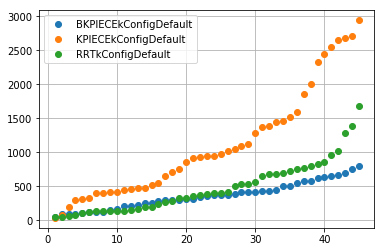

In [23]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 952.173423767 ms
KPIECEkConfigDefault - 4383.23235512 ms
RRTkConfigDefault - 2135.04185677 ms


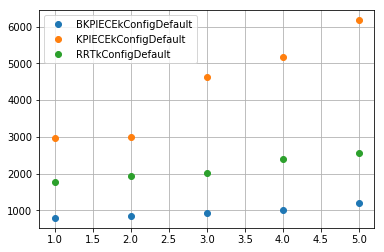

In [24]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

# ================= STOP! PRESEVE LOG! ======================

# ================= STOP! PRESEVE LOG! ======================

# ================= STOP! PRESEVE LOG! ======================

# ================= STOP! PRESEVE LOG! ======================

# ================= STOP! PRESEVE LOG! ======================

# ================= STOP! PRESEVE LOG! ======================

# ================= STOP! PRESEVE LOG! ======================

### log - from off position to left floor, near to far, w. panda, collision body 15cm clearance 5mm, floating 3m track

BKPIECEkConfigDefault - 364.211755329 ms
KPIECEkConfigDefault - 1111.92541652 ms
RRTkConfigDefault - 480.864795049 ms


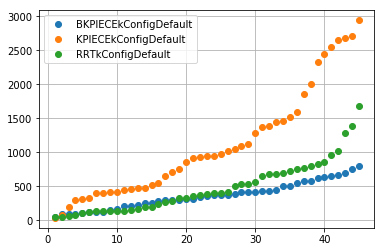

In [23]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 952.173423767 ms
KPIECEkConfigDefault - 4383.23235512 ms
RRTkConfigDefault - 2135.04185677 ms


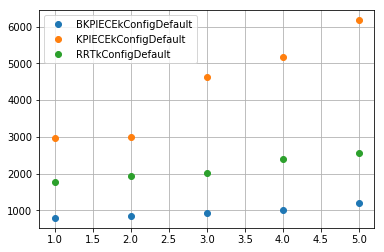

In [24]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from off position to left floor, near to far, w. panda, collision body 15cm clearance 5mm, floating 50cm track

BKPIECEkConfigDefault - 951.631975174 ms
KPIECEkConfigDefault - 351.74937778 ms
RRTkConfigDefault - 73.9153014289 ms


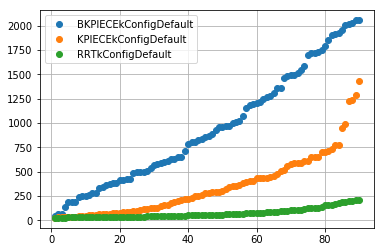

In [21]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 2735.27412415 ms
KPIECEkConfigDefault - 1811.55388355 ms
RRTkConfigDefault - 1235.98101139 ms


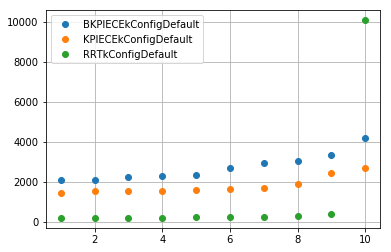

In [22]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from off position to left floor, near to far, w. panda, collision body 15cm clearance 5mm

BKPIECEkConfigDefault - 411.180851195 ms
KPIECEkConfigDefault - 888.517480426 ms
RRTkConfigDefault - 398.357174132 ms


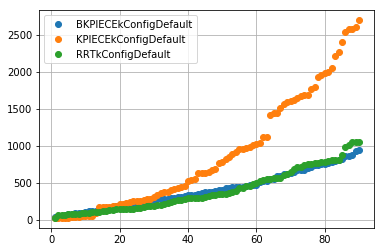

In [24]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 1258.0697298 ms
KPIECEkConfigDefault - 4873.78735542 ms
RRTkConfigDefault - 2249.45073128 ms


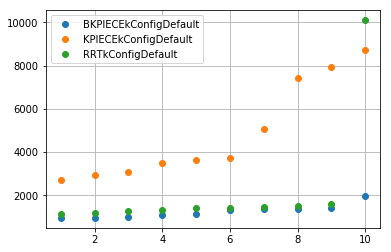

In [25]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from off position to left floor, near to far, w. panda, collision body 10cm clearance 5mm

BKPIECEkConfigDefault - 378.663039207 ms
KPIECEkConfigDefault - 1293.35561593 ms
RRTkConfigDefault - 348.713739713 ms


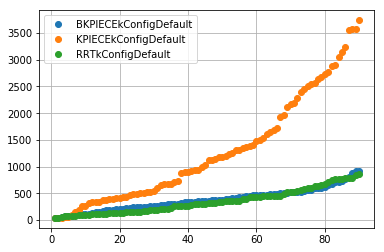

In [21]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 1222.16172218 ms
KPIECEkConfigDefault - 4766.97676182 ms
RRTkConfigDefault - 1499.29749966 ms


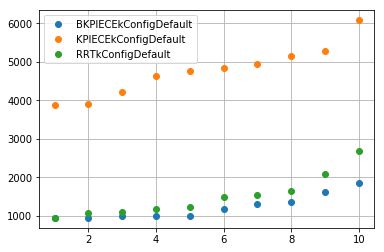

In [22]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from off position to left floor, near to far, w. panda

BKPIECEkConfigDefault - 426.150796149 ms
KPIECEkConfigDefault - 1050.62039958 ms
RRTkConfigDefault - 321.086035834 ms


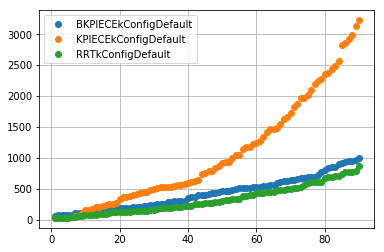

In [20]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 1149.94819164 ms
KPIECEkConfigDefault - 5498.2560873 ms
RRTkConfigDefault - 2982.3018074 ms


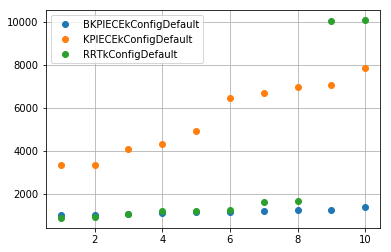

In [21]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from off position to left floor, near to far

BKPIECEkConfigDefault - 303.382174174 ms
KPIECEkConfigDefault - 818.667078018 ms
RRTkConfigDefault - 299.026881324 ms


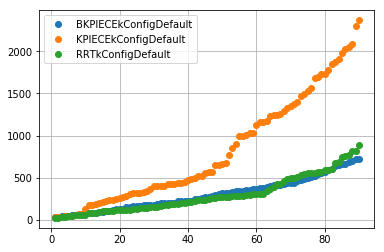

In [24]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 959.244418144 ms
KPIECEkConfigDefault - 3557.51888752 ms
RRTkConfigDefault - 1816.56241417 ms


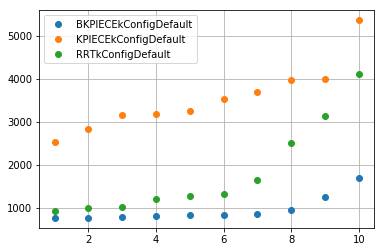

In [25]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from off position to left floor, far to near

BKPIECEkConfigDefault - 339.733921157 ms
KPIECEkConfigDefault - 805.74444135 ms
RRTkConfigDefault - 545.071381993 ms


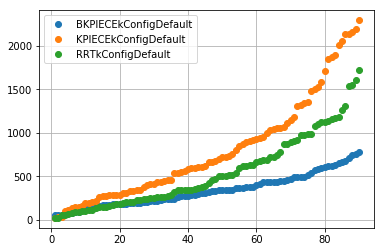

In [34]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:int(len(v)*0.9)]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 1094.71886158 ms
KPIECEkConfigDefault - 3799.35190678 ms
RRTkConfigDefault - 2274.76451397 ms


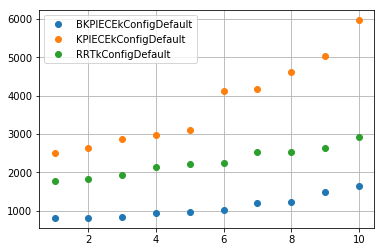

In [35]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[int(len(v)*0.9):]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

### log - from origin to right floor, far to near

BKPIECEkConfigDefault - 362.981335081 ms
KPIECEkConfigDefault - 431.381147076 ms
RRTkConfigDefault - 396.254396679 ms


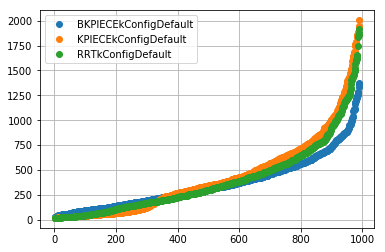

In [31]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[:990]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

BKPIECEkConfigDefault - 1717.57669449 ms
KPIECEkConfigDefault - 2274.61001873 ms
RRTkConfigDefault - 3942.07875729 ms


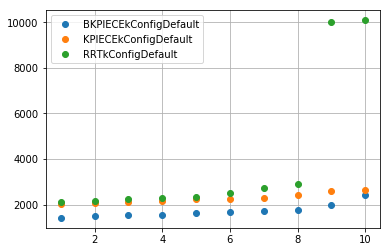

In [32]:
KEY_LIST = []
for k, v in gtimer.timelist_dict.items():
    v = sorted(v)[990:]
    plt.plot(np.arange(len(v))+1, sorted(v), 'o')
    KEY_LIST.append(k)
    print("{} - {} ms".format(k, np.mean(v)))
plt.legend(KEY_LIST)
plt.grid()

#### constrained motion times
```
BKPIECEkConfigDefault: 	30617.1 ms/100 = 306.2 ms (45.038/900.671)
KPIECEkConfigDefault: 	40873.6 ms/100 = 408.7 ms (19.622/1969.107)
RRTkConfigDefault: 	43292.3 ms/100 = 432.9 ms (18.505/2624.852)
RRTConnectkConfigDefault: 	27144.7 ms/5 = 5428.9 ms (251.446/7565.886)
LBKPIECEkConfigDefault: 	43063.5 ms/5 = 8612.7 ms (5521.325/10175.108)
```

### visualize trajectory

In [23]:
with gtimer.block("BKPIECEkConfigDefault"):
    Traj, LastQ, error, success, binding_list = mplan.plan_transition(
        from_state, to_state, redundancy_dict, timeout=10, 
        plannerconfig=PlannerConfig.BKPIECEkConfigDefault, 
        cs_type=ConstrainedSpaceType.PROJECTED)
gscene.clear_highlight()
gscene.show_motion(Traj, period=0.05)
sweep_face.draw_traj_coords(Traj, "traj_{}".format(sweep_face.name))

try constrained motion
constrained motion tried: True


[array([[ 9.99999632e-01,  3.33836420e-04, -7.90827277e-04,
          6.00245614e-01],
        [-3.34316828e-04,  9.99999773e-01, -6.16745465e-04,
         -2.99787686e-01],
        [ 7.90625248e-04,  6.17008879e-04,  9.99999484e-01,
          4.78774466e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.99999632e-01,  3.33836420e-04, -7.90827277e-04,
          6.00245614e-01],
        [-3.34316828e-04,  9.99999773e-01, -6.16745465e-04,
         -2.99787686e-01],
        [ 7.90625248e-04,  6.17008879e-04,  9.99999484e-01,
          4.78774466e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.99999726e-01,  2.70935763e-08,  7.96994360e-04,
          5.93760380e-01],
        [ 1.49433995e-06,  9.99998161e-01, -1.92427492e-03,
         -3.00000833e-01],
        [-7.96980064e-04,  1.92427323e-03,  9.99997889e-01,
          5.00095742e-03],
        [ 0.00000000e+00,  0.00000000e+